C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/
- age_gender_info.csv
- sample_submission.csv
- test.csv
- train.csv

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np

In [29]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [2]:
train = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/train.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/test.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/DACON_Parking_Demand/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

< train >
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
'도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'], dtype='object')

---

< test >
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수'], dtype='object')

train에만 등록차량수 column이 존재함

< sub >
Index(['code', 'num'], dtype='object') 

---

< age >
Index(['지역', '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)',
       '20대(남자)', '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)',
       '50대(남자)', '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)',
       '80대(남자)', '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')

In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

(None, None)

In [13]:
print(train.isnull().sum())
print('----------------------------------')
print(test.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64
----------------------------------
단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 

In [18]:
train.head(20)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0


### 수치형 데이터의 분포확인

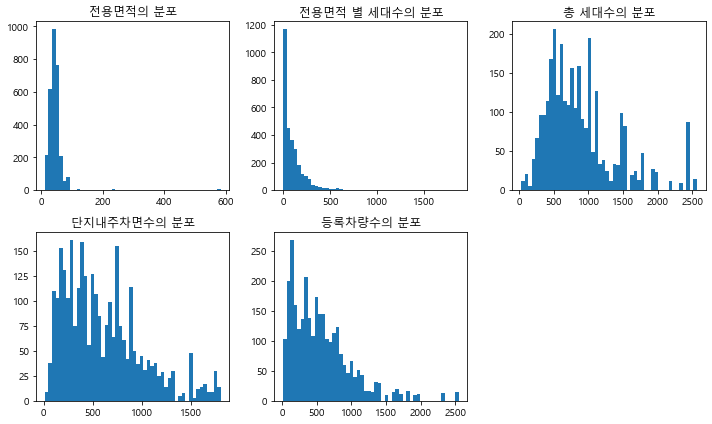

In [35]:
plt.figure(figsize=(10,6), facecolor='white')

plt.subplot(231)
plt.hist(train['전용면적'], bins=50)
plt.title('전용면적의 분포')

plt.subplot(232)
plt.hist(train['전용면적별세대수'], bins=50)
plt.title('전용면적 별 세대수의 분포')

plt.subplot(233)
plt.hist(train['총세대수'], bins=50)
plt.title('총 세대수의 분포')

plt.subplot(234)
plt.hist(train['단지내주차면수'], bins=50)
plt.title('단지내주차면수의 분포')

plt.subplot(235)
plt.hist(train['등록차량수'], bins=50)
plt.title('등록차량수의 분포')

plt.tight_layout()
plt.show()

임대건물구분	지역	공급유형  자격유형

In [38]:
print(train['임대건물구분'].value_counts(), end='\n\n')
print(train['지역'].value_counts(), end='\n\n')
print(train['공급유형'].value_counts(), end='\n\n')
print(train['자격유형'].value_counts(), end='\n\n')

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64



### 범주형 데이터 Counting

In [53]:
test1 = train['임대건물구분'].value_counts()
test2 = train['지역'].value_counts()
test3 = train['공급유형'].value_counts()
test4 = train['자격유형'].value_counts()

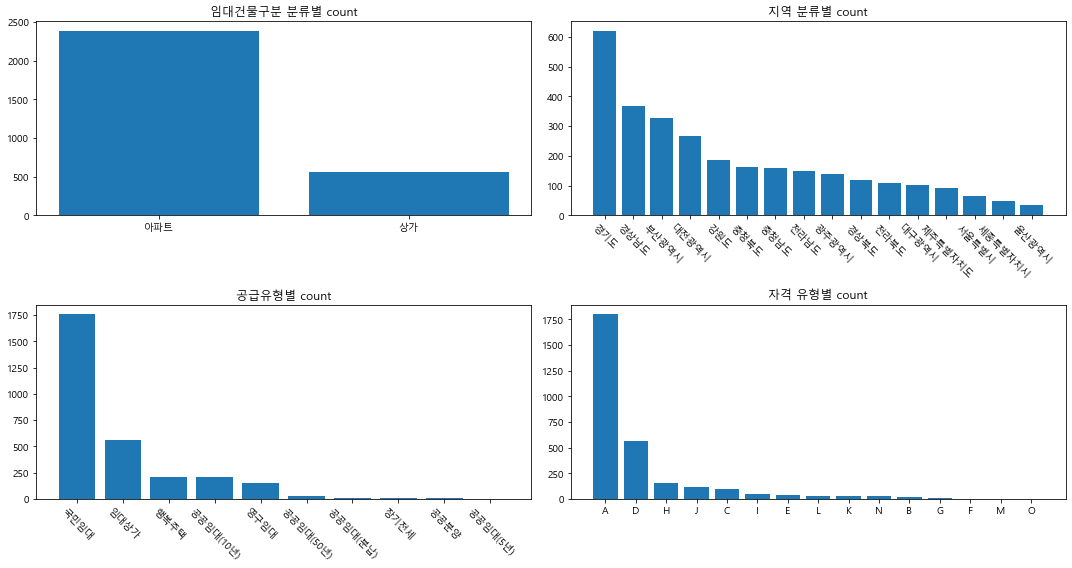

In [59]:
plt.figure(figsize=(15,8), facecolor='white')

plt.subplot(221)
plt.bar(x=test1.index, height=test1.values)
plt.title('임대건물구분 분류별 count')

plt.subplot(222)
plt.bar(x=test2.index, height=test2.values)
plt.xticks(rotation=-45)
plt.title('지역 분류별 count')

plt.subplot(223)
plt.bar(x=test3.index, height=test3.values)
plt.xticks(rotation=-45)
plt.title('공급유형별 count')

plt.subplot(224)
plt.bar(x=test4.index, height=test4.values)
plt.title('자격 유형별 count')

plt.tight_layout()
plt.show()

### 학습 한 잔

In [60]:
sel = ['총세대수']
X_train = train[sel]
X_test = test[sel]
y_train = train['등록차량수']

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

pred

array([524.31256846, 524.31256846, 524.31256846, ..., 424.88994317,
       424.88994317, 424.88994317])

### transform 함수
결과 값을 각 행에 넣어주고싶을 때 사용

In [66]:
test['등록차량수'] = pred

test['코드별차량수평균'] = test.groupby('단지코드')['등록차량수'].transform(np.mean)

test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,코드별차량수평균
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,524.312568,524.312568
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,524.312568,524.312568


### drop_duplicates
맨 처음 것만 놔두고 밑의 중복 값을 다 없앤다.

In [70]:
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()

sub_df = test_new[['단지코드', '코드별차량수평균']]
sub_df.columns = [['code', 'num']]
sub_df

,code,num
0,C1072,524.312568
1,C1128,684.671641
2,C1456,488.231777
3,C1840,481.282884
4,C1332,669.437530
...,...,...
145,C2456,416.070194
146,C1266,482.084679
147,C2152,354.866481
148,C1267,503.198624


In [71]:
sub_df.to_csv('first_submit.csv', index=False)